In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms

from utils import *
from learner import *

d:\Machine Learning\pytorch\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
BATCH_SIZE = 64
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_dataloader, test_dataloader, class_names = dataloader(train_dataset, test_dataset, BATCH_SIZE)

In [4]:
beta_min, beta_max, n_steps = 0.0001, 0.02, 1000
beta = torch.linspace(beta_min, beta_max, n_steps)
alpha = 1 - beta
alpha_bar = alpha.cumprod(dim=0)
sigma = beta.sqrt()

In [5]:
beta.shape, alpha.shape, alpha_bar.shape, sigma.shape

(torch.Size([1000]),
 torch.Size([1000]),
 torch.Size([1000]),
 torch.Size([1000]))

In [6]:
def plot_ddpm(data, title):
    plt.title(title)
    plt.plot(data)
    plt.show()

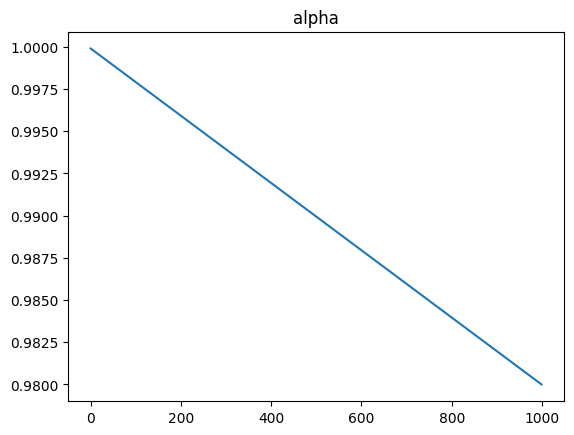

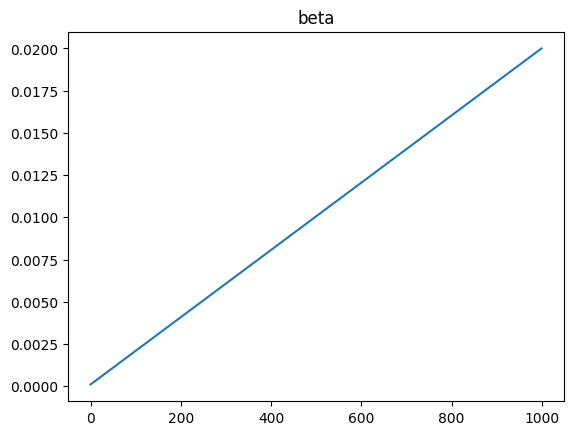

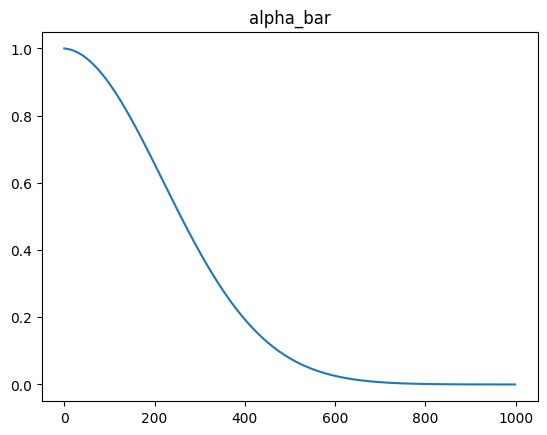

In [7]:
plot_ddpm(alpha, "alpha")
plot_ddpm(beta, "beta")
plot_ddpm(alpha_bar, "alpha_bar")

In [8]:
def noisify(x0, alpha_bar):
    device = x0.device
    n = len(x0)
    t = torch.randint(0, n_steps, (n,), dtype=torch.long)
    noise = torch.randn(x0.shape, device=device)
    alpha_bar_t = alpha_bar[t].reshape(-1, 1, 1, 1).to(device)
    xt = alpha_bar_t.sqrt()*x0 + (1-alpha_bar_t).sqrt()*noise
    return (xt, t.to(device)), noise

In [9]:
X, y = next(iter(train_dataloader))

In [10]:
(xt,t), noise = noisify(X, alpha_bar)
t

tensor([622, 435, 921, 385,  38, 942, 623, 306, 835, 493, 791, 834, 440, 226,
        943, 521, 232, 161, 500, 711, 418, 539,  86, 191, 998, 243, 968, 779,
        603, 991, 339, 992, 164, 955, 581, 729, 726, 346, 145, 561, 870, 373,
        694, 549, 321, 615, 662, 857, 831, 118, 318, 382, 471, 651, 480, 510,
        574, 941,   0, 230, 179, 515, 759,  73])

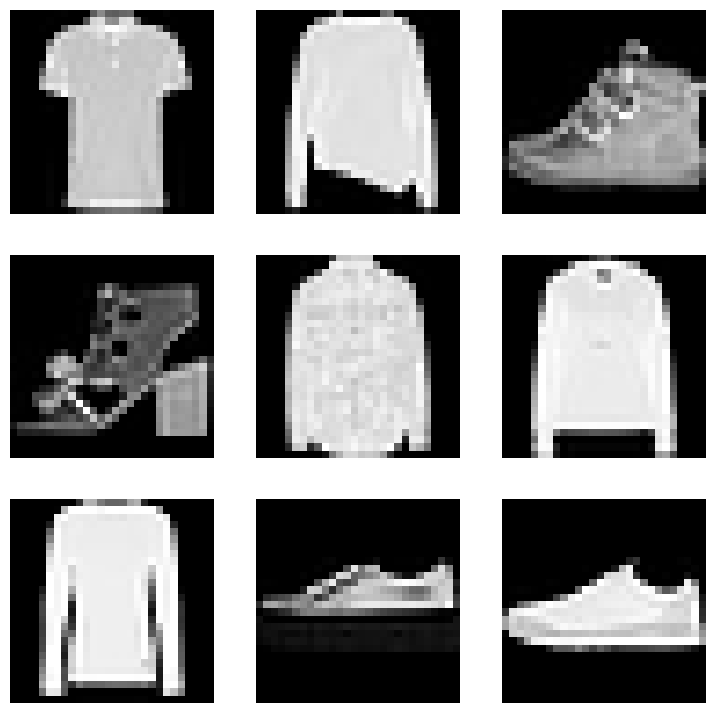

In [11]:
show_images(X)

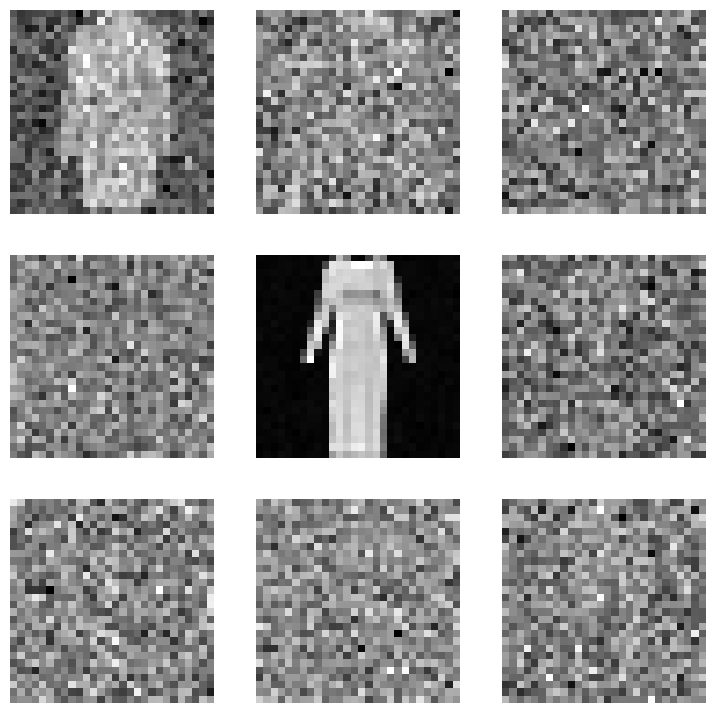

In [12]:
show_images(xt)

In [ ]:
class DDPM():
    def __init__(self, beta_min, beta_max, n_steps):
        init_attr(self, locals=locals())
        self.beta = torch.linspace(self.beta_min, self.beta_max, self.n_steps)
        self.alpha = 1 - self.beta
        self.alpha_bar = self.alpha.cumprod(dim=0)
        self.sigma = self.beta.sqrt()
